In [9]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

In [15]:
import matplotlib.pyplot as plt
from src.vdyn.longitudinal_1d import accel_brake_test

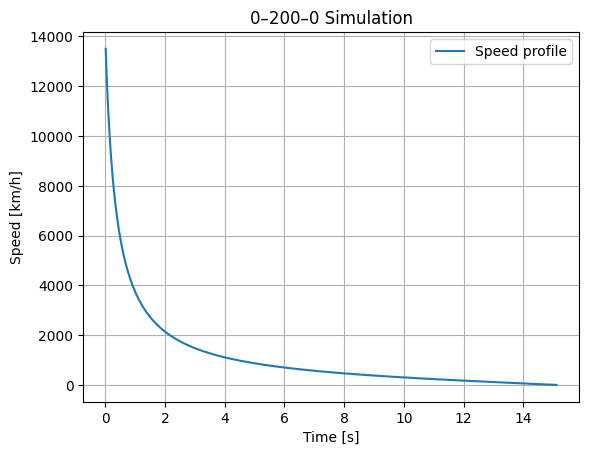

In [16]:
#Run simulaton
t, v = accel_brake_test()

# Convert m/s to km/h
v_kmh = v * 3.6

# Plot results
plt.plot(t, v_kmh, label="Speed profile")
plt.xlabel("Time [s]")
plt.ylabel("Speed [km/h]")
plt.title("0–200–0 Simulation")
plt.grid(True)
plt.legend()
plt.show()